Let's import the necessary things

In [1]:
import bt
import pandas as pd

from interpreter import BTInterpreter
from datetime import date, timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Let's create a simple buy and hold strategy with one asset

In [2]:
node: dict = {
    'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
    'node-type': 'asset',
    'ticker': 'QQQ'
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
actual: bt.backtest.Result = subject.traverse()

[*********************100%***********************]  1 of 1 completed


## Show stats, transactions, weights and security weights of the buy and hold strategy

In [3]:
actual.stats

,df876984-3be8-40c9-8847-e3b3c6af3cdc
start,2023-05-18 00:00:00
end,2023-06-15 00:00:00
rf,0.0
total_return,0.096612
cagr,2.330242
max_drawdown,-0.017741
calmar,131.348931
mtd,0.063996
three_month,NaN
six_month,NaN


In [4]:
actual.get_transactions()

,,price,quantity
Date,Security,,
2023-05-22,QQQ,337.640015,2961.734263


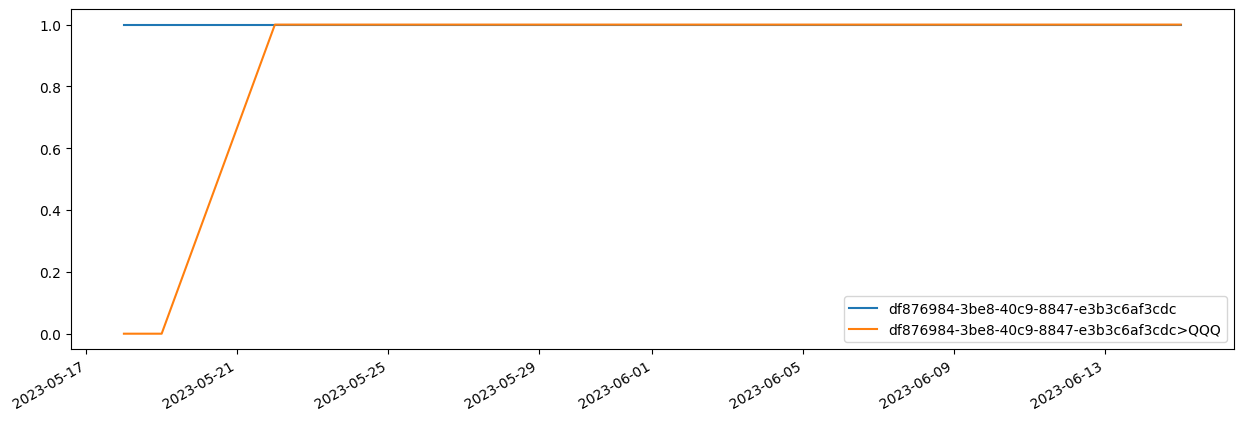

In [5]:
actual.plot_weights()

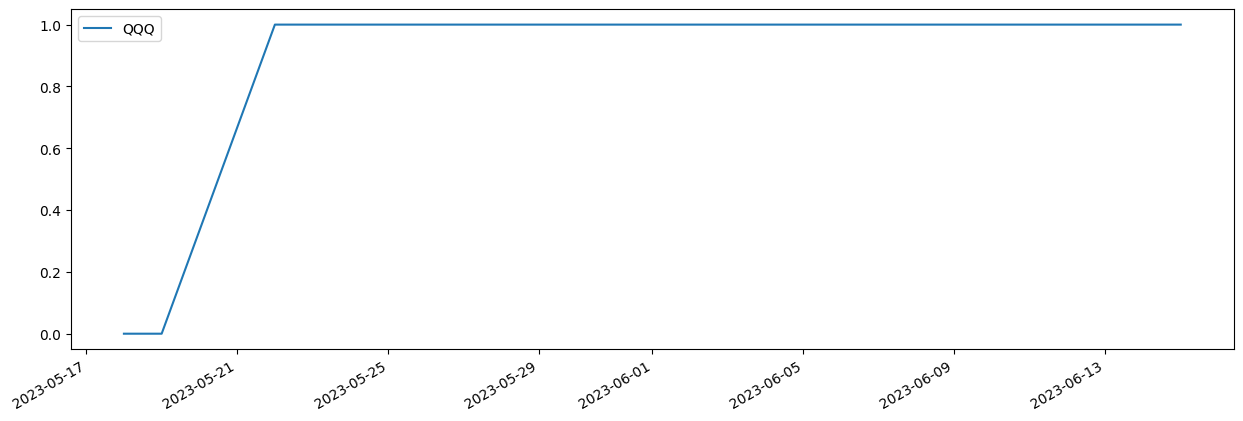

In [6]:
actual.plot_security_weights()

Conclusion: Works like desired

## Show stats, transactions, weights and security weights of a first level composite strategy

In [7]:
node: dict = {
    'id': '5fc986bf-d7c8-4582-bc27-f1ede76bdc29',
    'node-type': 'group',
    'children': [
        {
            'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
            'node-type': 'asset',
            'ticker': 'QQQ'
        },
        {
            'id': '742dc790-d0f7-472d-bd3e-405e411c0b2c',
            'node-type': 'asset',
            'ticker': 'SPY'
        }
    ]
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
actual: bt.backtest.Result = subject.traverse()

[*********************100%***********************]  1 of 1 completed

2023-05-22 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-23 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-24 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-25 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-26 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-30 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-31 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-06-01 00:00:00: 5fc986

In [8]:
actual.stats

,5fc986bf-d7c8-4582-bc27-f1ede76bdc29
start,2023-05-17 00:00:00
end,2023-06-15 00:00:00
rf,0.0
total_return,0.0
cagr,0.0
max_drawdown,0.0
calmar,NaN
mtd,0.0
three_month,NaN
six_month,NaN


In [13]:
actual.get_transactions()

price     quantity
Date       Security                   
2023-05-17 QQQ        NaN  2961.734263
           SPY        NaN  2387.831561
2023-05-22 QQQ        NaN -2961.734263
           SPY        NaN -2387.831561

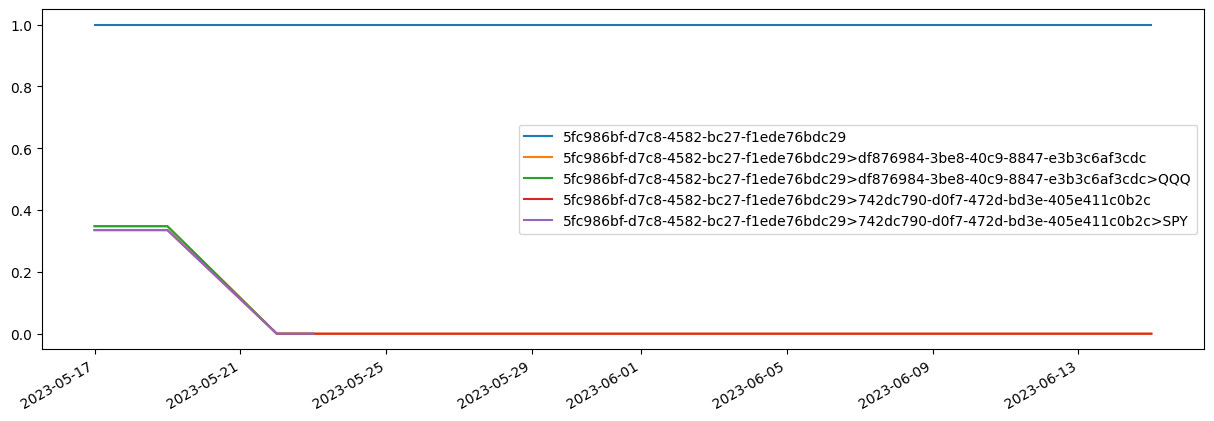

In [14]:
actual.plot_weights()

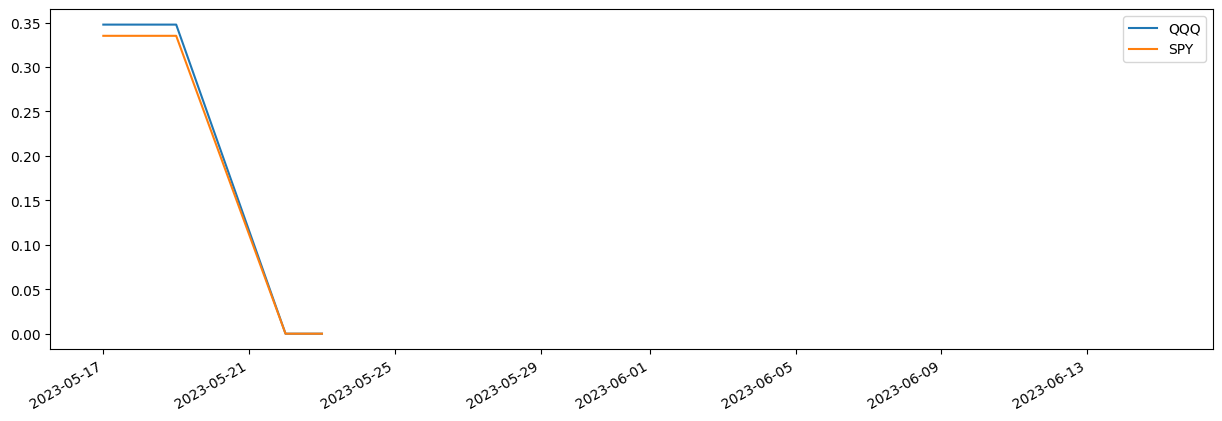

In [15]:
actual.plot_security_weights()

Conclusion: The strategy does not have a return, but some other statistics. It has sold everything on the 4th day and rebalancing is not propagated to the children.

## Show stats, transactions, weights and security weights of a second level composite strategy

In [12]:
node: dict = {
    'id': 'c20d0968-2dfa-4ff7-8dfc-4c3d0df36dd4',
    'node-type': 'group',
    'children': [
        {
            'id': '5fc986bf-d7c8-4582-bc27-f1ede76bdc29 ',
            'node-type': 'group',
            'children': [
                {
                    'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
                    'node-type': 'asset',
                    'ticker': 'QQQ'
                },
                {
                    'id': '742dc790-d0f7-472d-bd3e-405e411c0b2c',
                    'node-type': 'asset',
                    'ticker': 'SPY'
                }
            ]
        },
        {
            'id': 'e5286ea7-9591-4b43-896e-cf34fb63a0e0',
            'node-type': 'group',
            'children': [
                {
                    'id': '9e4f255b-343a-43ee-a433-f2366f8e9e62',
                    'node-type': 'asset',
                    'ticker': 'IYY'
                },
                {
                    'id': '57033cdf-c185-4091-9d3e-3fc1e17913be',
                    'node-type': 'asset',
                    'ticker': 'IWM'
                }
            ]
        },
        {
            'id': '07306351-709d-41d8-b8dd-d8f6e6ae2900',
            'node-type': 'asset',
            'ticker': 'IVV'
        }
    ]
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
actual: bt.backtest.Result = subject.traverse()


2023-05-22 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-23 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-24 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-25 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-26 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-30 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-05-31 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.3466
Weights: 
Series([], dtype: float64)

2023-06-01 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:3153466, Price:315.34

ZeroDivisionError: Could not update df876984-3be8-40c9-8847-e3b3c6af3cdc on 2023-05-17 00:00:00. Last value was 0.0 and net flows were 0. Currentvalue is 1000000.0. Therefore, we are dividing by zero to obtain the return for the period.

In [ ]:
actual.stats

In [ ]:
actual.get_transactions()

In [ ]:
actual.plot_weights()

In [ ]:
actual.plot_security_weights()

Conclusion: Something does not fit together :-(

How to get this example running?